In [31]:
from pymatgen.core import Structure
from vasppy.rdf import RadialDistributionFunction

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from figure_formatting import figure_formatting as ff

ff.set_formatting()

colors = {'blue': '#264653',
          'green': '#2A9D8F',
          'yellow': '#E9C46A',
          'light orange': '#F4A261',
          'dark orange': '#E76F51',
          'pink': '#F3B6A5'}

In [2]:
file_paths = [f'../../structure_prediction_dataset/vasp_4x4x4_from_ga/config_{i}/cubic/cp2k_opt/cp2k_opt.cif'
              for i in [1,2,3,4]]
structures = [Structure.from_file(f) for f in file_paths]

1
1
1
1


In [142]:
species_pairs = [('Ti', 'Ti'),
                 ('Ti', 'F'),
                 ('Ti', 'O'),
                 ('F', 'F'),
                 ('O', 'F'),
                 ('O', 'O')]

scaling = {'Ti': 1,
           'O': 1,
           'F': 2}

n_elect = {'Ti': 18,
           'O': 10,
           'F': 10}

rdf = {}
for s1, s2 in species_pairs:
    if s1 not in rdf:
        rdf[s1] = {}
    rdf[s1][s2] = RadialDistributionFunction.from_species_strings(structures=structures,
                                                           species_i=s1,
                                                           species_j=s2,
                                                           nbins=1000)

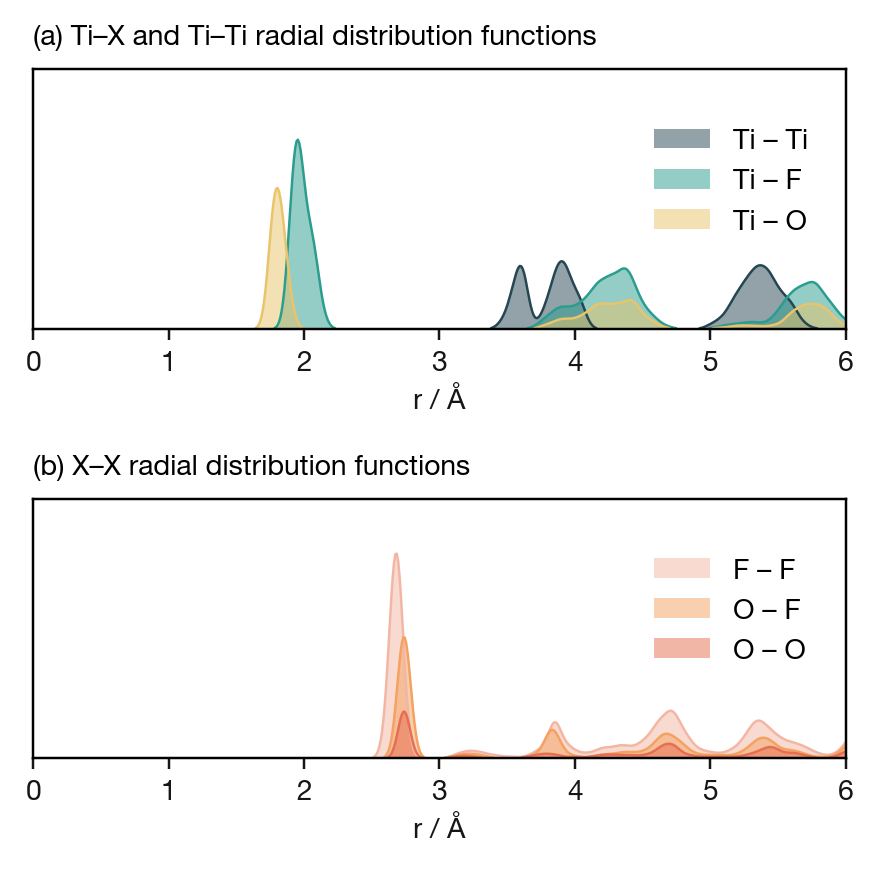

In [204]:
color_list = ['blue', 'green', 'yellow', 'pink', 'light orange', 'dark orange', 'pink']
# summed_rdf = np.zeros_like(rdf['O']['O'].smeared_rdf())

fig, ax = plt.subplots(2, 1, figsize=(3.5,3.5))
for i, (s1, s2) in enumerate(species_pairs):
    rdf_scaling = scaling[s1] * scaling[s2] * n_elect[s1] * n_elect[s2]
#     summed_rdf = summed_rdf + rdf[s1][s2].smeared_rdf(sigma=0.05) * rdf_scaling
    if s1 == 'Ti':
        a = 0
    else:
        a = 1
    y = rdf[s1][s2].smeared_rdf(sigma=0.04) * rdf_scaling
    ym = np.ma.masked_where(y < 20, y)
    ax[a].plot(rdf[s1][s2].r, ym, c=colors[color_list[i]])
    ax[a].fill_between(rdf[s1][s2].r, ym,
                       label=f'{s1} – {s2}', color=colors[color_list[i]], alpha=0.5, lw=0)
    
for a in range(2):
    ax[a].legend(loc=(0.75,0.32))
    ax[a].set_yticks([])
    ax[a].set_xlim(0, 6)
    ax[a].set_ylim(0, 6e3)
    ax[a].set_xticks(np.arange(7))
    ax[a].set_xlabel(r'$r$ / Å')
ax[0].set_title('(a) Ti–X and Ti–Ti radial distribution functions')
ax[1].set_title('(b) X–X radial distribution functions')
plt.tight_layout()
plt.savefig('../Figures/A-B_rdfs.pdf', dpi=300)
plt.show()
